## Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score ,KFold
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import datetime
import sklearn.preprocessing

## Read the data

In [3]:
Salaries = pd.read_csv("C:\\Users\\amroa\\Documents\\Backend Projects\\Python\\practice\\Project\\salaries.csv")
df = Salaries.copy()

## Trying out Functions

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.1+ MB


In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [11]:
df.duplicated().sum()

44340

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

## Data Preprocessing

In [14]:
df=df.drop(['company_size','employee_residence'],axis=1)

In [15]:
# Replacing '-' with 0
df['remote_ratio']=df['remote_ratio'].replace('0','-1')

# Converting remote_ratio type to float
df['remote_ratio'] = df['remote_ratio'].astype('float64')

## Visualizing Data

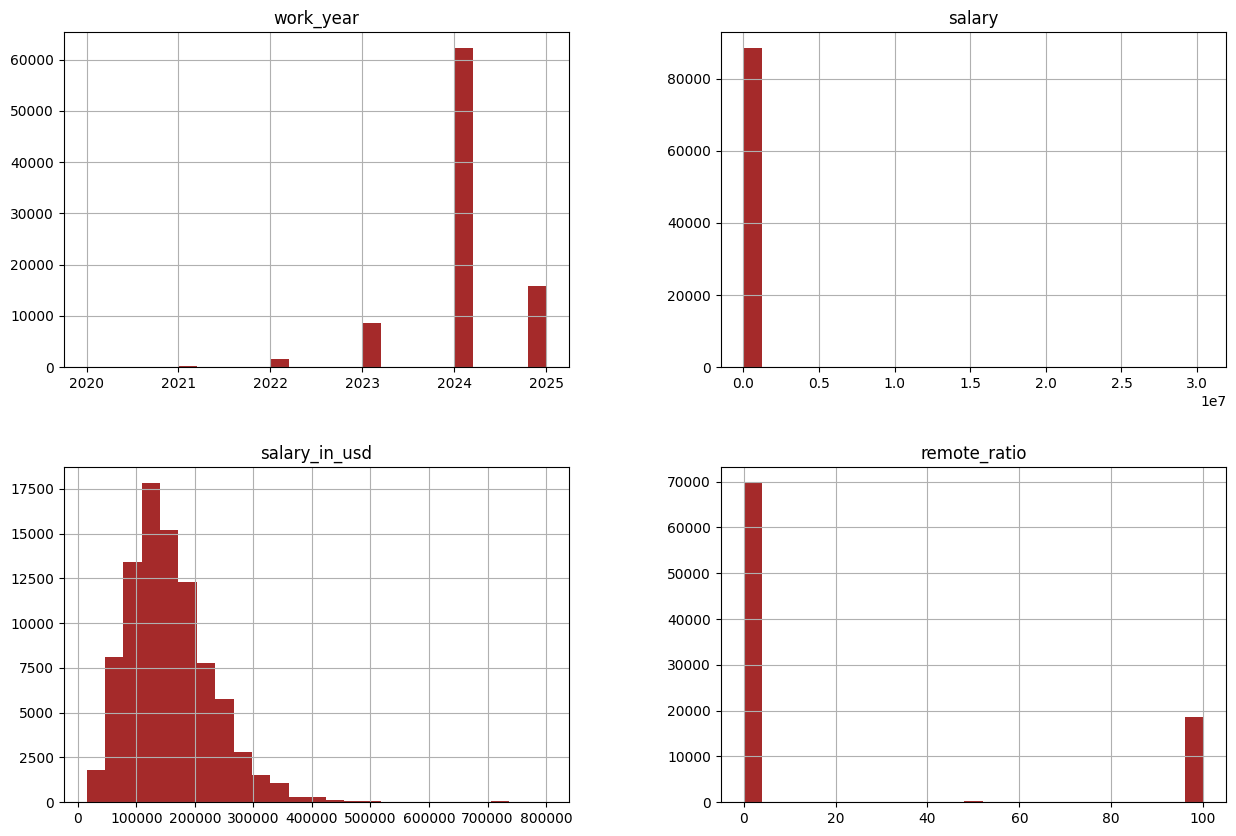

In [6]:
df.hist(bins=25,figsize=(15,10),color='brown')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

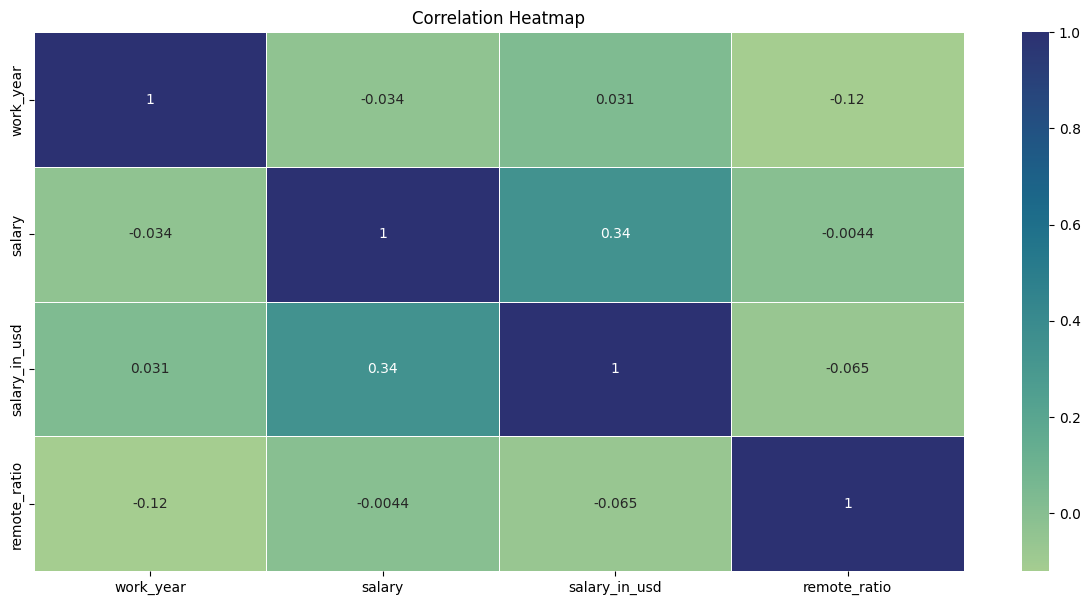

In [7]:
cor= df.select_dtypes(exclude=object).corr()
plt.figure(figsize=(15,7))
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='crest')
plt.title('Correlation Heatmap')

<AxesSubplot:xlabel='experience_level', ylabel='count'>

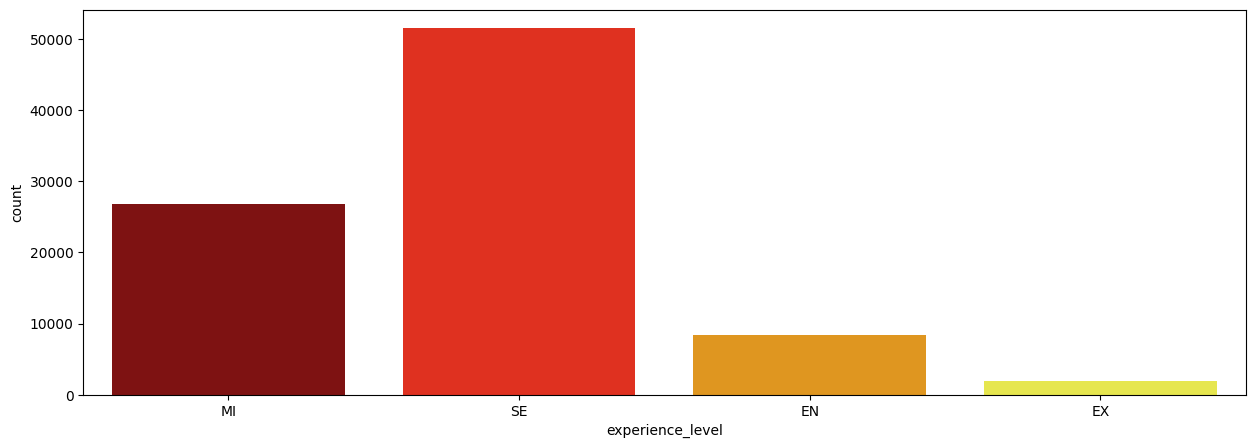

In [10]:
plt.subplots(figsize=(15,5))
sns.countplot(data= df, x='experience_level',palette='hot')

In [11]:
#Detect OutLier
numeric_data = df.select_dtypes(exclude=object)

for col in numeric_data:
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    iq = q1 - q2

    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")

Total Outliers in work_year are :26350---29.75%
Total Outliers in salary are :84254---95.11%
Total Outliers in salary_in_usd are :84521---95.41%
Total Outliers in remote_ratio are :19004---21.45%


## Training and Testing Data

In [14]:
X = df.drop(columns=['salary'])
y = df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(70867, 10)

In [16]:
X_test.shape

(17717, 10)